In [1]:
from chainconsumer import ChainConsumer
import jax.numpy as jnp 
import h5py
import jax
import numpy as np
import tensorflow_probability as tfp
tfd = tfp.distributions

In [2]:
params_name = [r'$\Omega_m$',r'$\sigma_8$',r'$w_0$',r'$h_0$',r'$n_s$', r'$\Omega_b$']

In [3]:
posterior_vmim_nbody = jnp.load('posterior_vmim_nbody.npy')
posterior_mse_nbody = jnp.load('posterior_mse_nbody.npy')
posterior_vmim_gaussian = jnp.load('posterior_vmim_gaussian.npy')
posterior_mse_gaussian = jnp.load('posterior_mse_gaussian.npy')
posterior_vmim_nbody_with_baryon_ia = jnp.load('posterior_vmim_nbody_with_baryon_ia.npy')
posterior_mse_nbody_with_baryon_ia = jnp.load('posterior_mse_nbody_with_baryon_ia.npy')

In [4]:
filename = '/gpfsdswork/dataset/CosmoGridV1/CosmoGridV1_metainfo.h5'
f = h5py.File(filename, "r")
dataset_grid = f['parameters']['fiducial']
cosmo_parameters = jnp.array([
            dataset_grid['Om'],
            dataset_grid['s8'],
            dataset_grid['w0'],
            dataset_grid['H0']/100,
            dataset_grid['ns'],
            dataset_grid['Ob']
        ]).T
truth = list(cosmo_parameters[0])

# check prior and proposal

In [5]:
filename = '/gpfsdswork/dataset/CosmoGridV1/CosmoGridV1_metainfo.h5'
f = h5py.File(filename, "r")
dataset_grid = f['parameters']['grid']

cosmo_parameters = jnp.array([
    dataset_grid['Om'],
    dataset_grid['s8'],
    dataset_grid['w0'],
    dataset_grid['H0']/100,
    dataset_grid['ns'],
    dataset_grid['Ob']
]).T


Om_sample = tfd.Uniform(0.1,0.5).sample(1000, jax.random.PRNGKey(0))
s8_sample  = tfd.Uniform(0.4,1.4).sample(1000, jax.random.PRNGKey(10))
h_sample = tfd.Uniform(0.64, 0.82).sample(1000, jax.random.PRNGKey(20))
Ob_sample  = tfd.Uniform(0.03,0.06).sample(1000, jax.random.PRNGKey(30))
ns_sample  = tfd.Uniform(0.87, 1.07).sample(1000, jax.random.PRNGKey(40))
w0_sample  = tfd.Uniform(-2.0, -0.333).sample(1000, jax.random.PRNGKey(50))

prior = jnp.array([Om_sample, s8_sample, w0_sample, h_sample, ns_sample, Ob_sample]).T

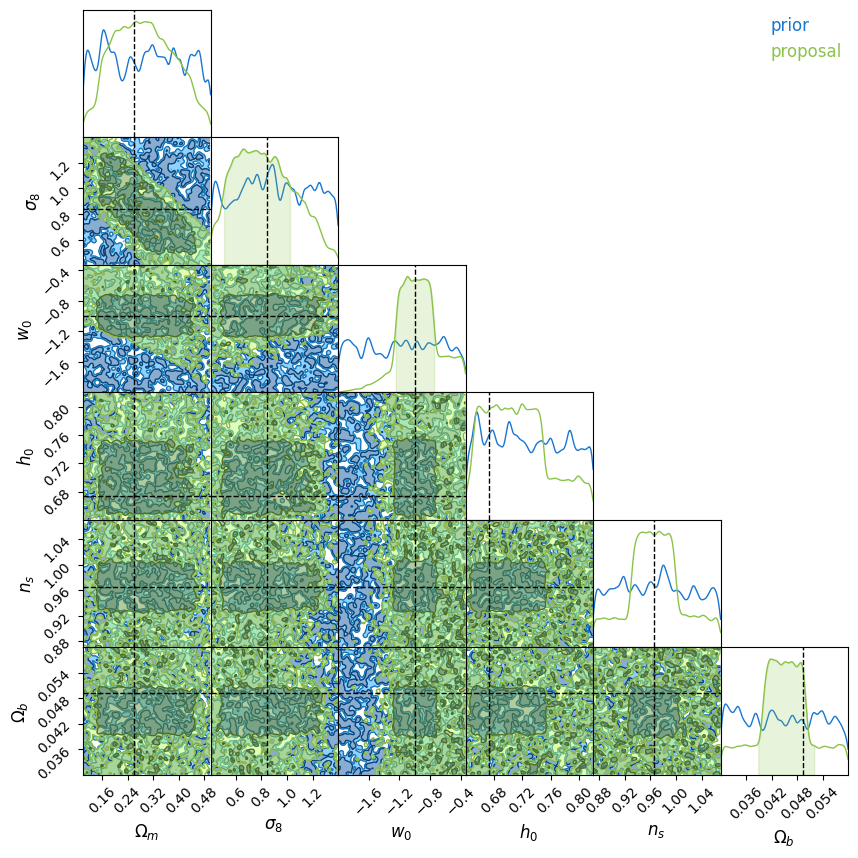

In [6]:
from chainconsumer import ChainConsumer

params_name = [r'$\Omega_m$',r'$\sigma_8$',r'$w_0$',r'$h_0$',r'$n_s$', r'$\Omega_b$']

c = ChainConsumer()
c.add_chain(
    prior,
    shade_alpha = 0.5, 
    parameters = params_name, 
    name = 'prior'
)
c.add_chain(
    cosmo_parameters,
    shade_alpha = 0.5, 
    parameters = params_name, 
    name = 'proposal'
)

fig = c.plotter.plot(figsize=1.,truth=truth)

# vmim vs mse

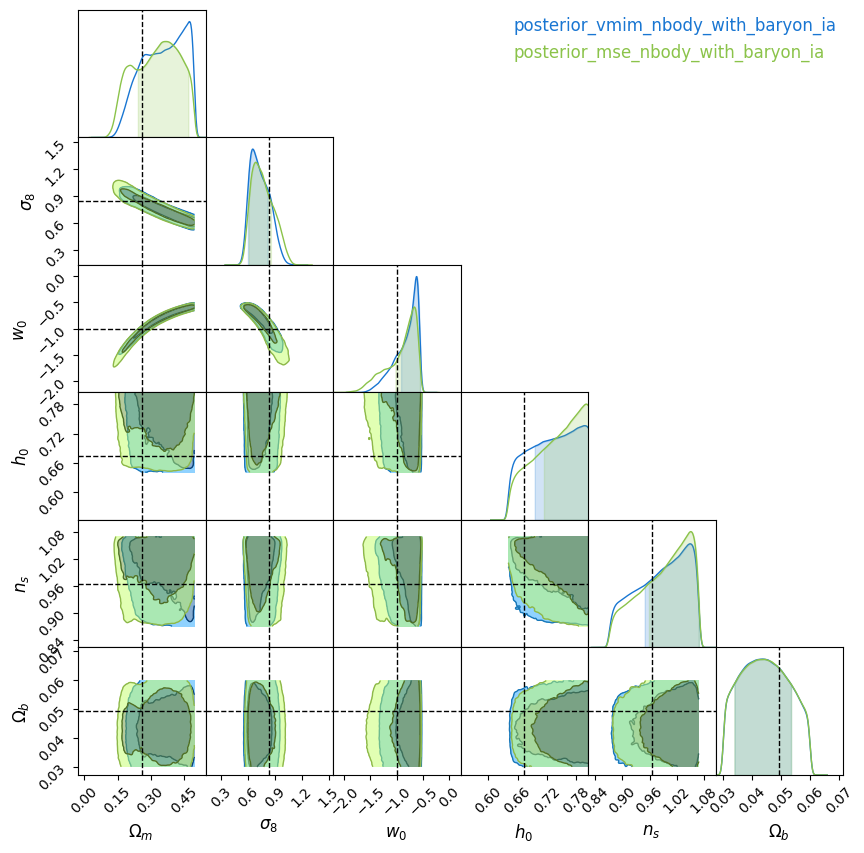

In [7]:
c = ChainConsumer()

c.add_chain(
    posterior_vmim_nbody_with_baryon_ia,
    shade_alpha = 0.5, 
    parameters = params_name, 
    name = 'posterior_vmim_nbody_with_baryon_ia'
)

c.add_chain(
    posterior_mse_nbody_with_baryon_ia,
    shade_alpha = 0.5,
    parameters = params_name,
    name = 'posterior_mse_nbody_with_baryon_ia'
)


fig = c.plotter.plot(figsize=1.,truth=truth , extents=[[t - 2.5 * np.std(prior[:,i]),
              t + 2.5 * np.std(prior[:,i])] for i,t in enumerate(truth)]
)

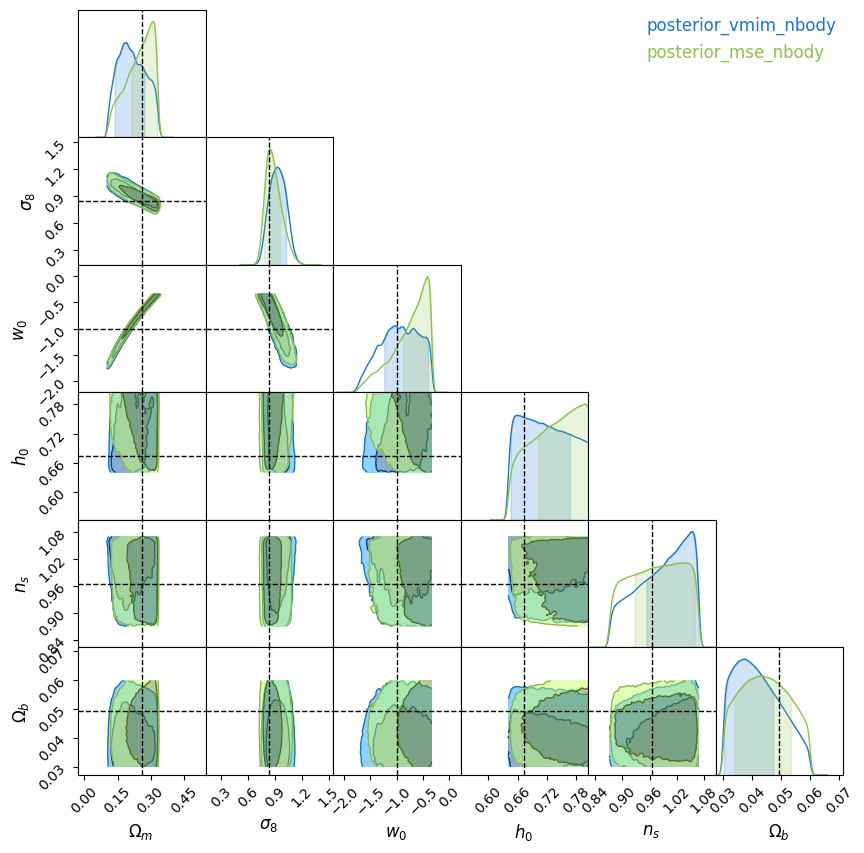

In [8]:
c = ChainConsumer()

c.add_chain(
    posterior_vmim_nbody,
    shade_alpha = 0.5, 
    parameters = params_name, 
    name = 'posterior_vmim_nbody'
)

c.add_chain(
    posterior_mse_nbody,
    shade_alpha = 0.5,
    parameters = params_name,
    name = 'posterior_mse_nbody'
)


fig = c.plotter.plot(figsize=1.,truth=truth , extents=[[t - 2.5 * np.std(prior[:,i]),
              t + 2.5 * np.std(prior[:,i])] for i,t in enumerate(truth)]
)

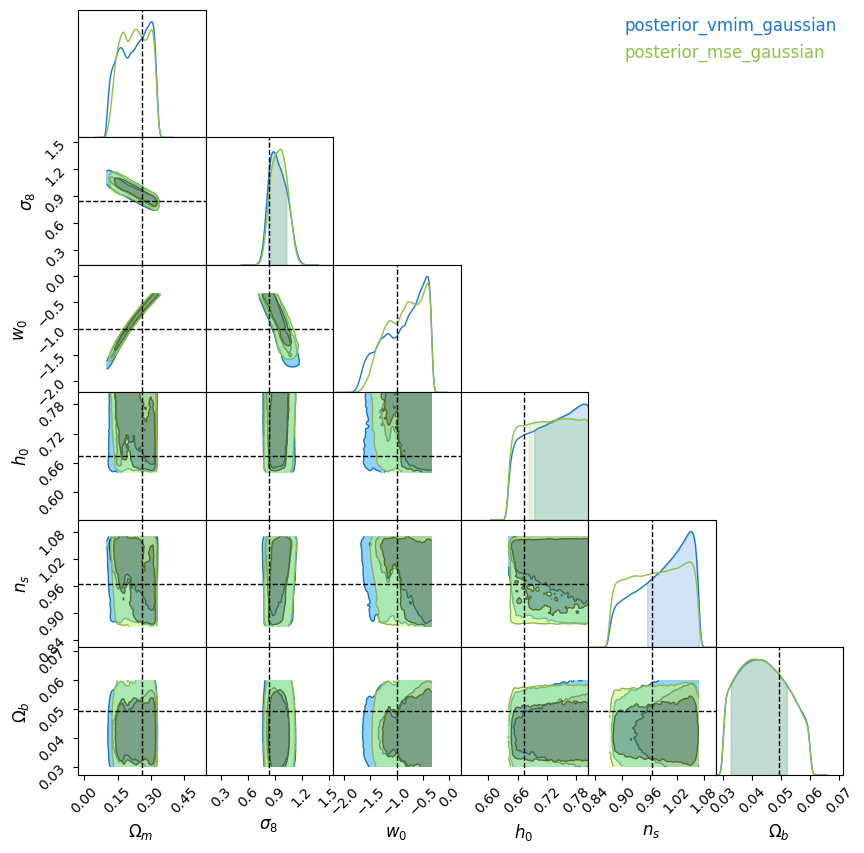

In [9]:
c = ChainConsumer()

c.add_chain(
    posterior_vmim_gaussian,
    shade_alpha = 0.5, 
    parameters = params_name, 
    name = 'posterior_vmim_gaussian'
)

c.add_chain(
    posterior_mse_gaussian,
    shade_alpha = 0.5,
    parameters = params_name,
    name = 'posterior_mse_gaussian'
)


fig = c.plotter.plot(figsize=1.,truth=truth , extents=[[t - 2.5 * np.std(prior[:,i]),
              t + 2.5 * np.std(prior[:,i])] for i,t in enumerate(truth)]
)

# comparison dif models

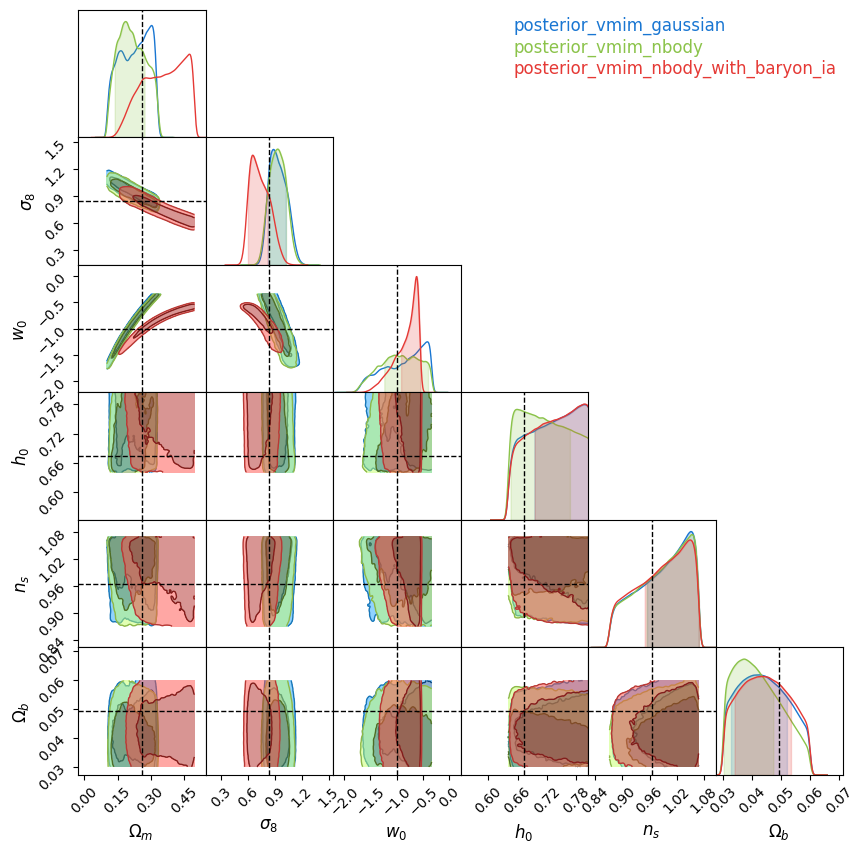

In [10]:
c = ChainConsumer()

c.add_chain(
    posterior_vmim_gaussian,
    shade_alpha = 0.5, 
    parameters = params_name, 
    name = 'posterior_vmim_gaussian'
)

c.add_chain(
    posterior_vmim_nbody,
    shade_alpha = 0.5, 
    parameters = params_name, 
    name = 'posterior_vmim_nbody'
)

c.add_chain(
    posterior_vmim_nbody_with_baryon_ia,
    shade_alpha = 0.5, 
    parameters = params_name, 
    name = 'posterior_vmim_nbody_with_baryon_ia'
)


fig = c.plotter.plot(figsize=1.,truth=truth , extents=[[t - 2.5 * np.std(prior[:,i]),
              t + 2.5 * np.std(prior[:,i])] for i,t in enumerate(truth)]
)